In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt

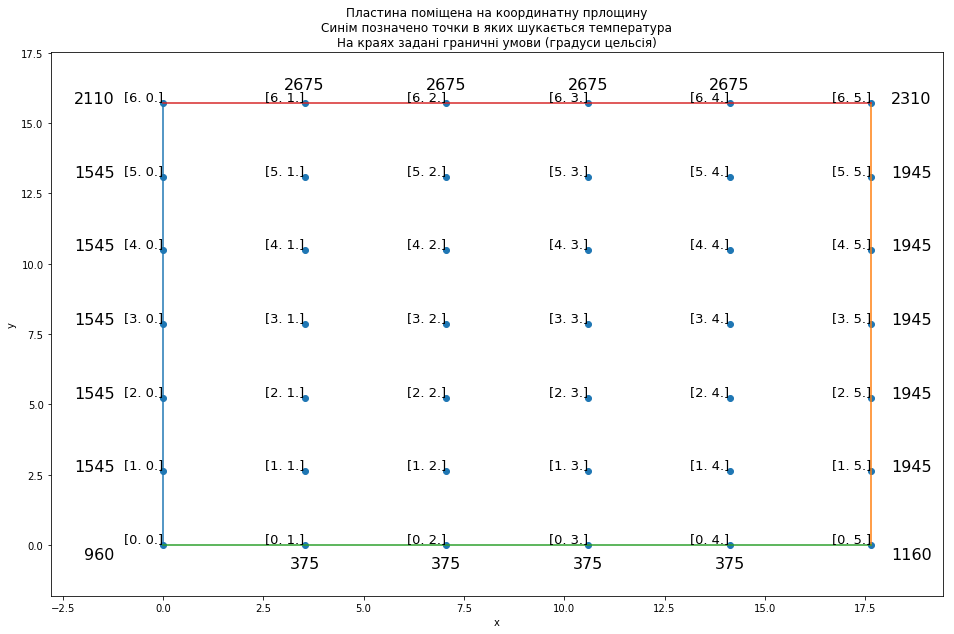

In [138]:
h = 3.53
l = 2.62
c_x = 4
c_y = 5
t_up = 2675
t_down = 375
t_left = 1545
t_right = 1945
t_up_left = (t_up + t_left)/2
t_up_right = (t_up + t_right)/2
t_down_right = (t_down + t_right)/2
t_down_left = (t_down + t_left)/2
count_equal = c_x * c_y
P_all = []
for i in range(c_y+2):
    for j in range(c_x+2):
        P_all.append([i*l, round(j*h, 2)])
P_all = np.array(P_all)
P_all_t = copy.deepcopy(P_all.T)
P_all[:,0] = P_all[:,0]/l
P_all[:,1] = P_all[:,1]/h
P_in = []
for i in range(c_y+2):
    for j in range(c_x+2):
        P_in.append([i*l, round(j*h, 2)])
P_in = np.array(P_all)
P_in_t = copy.deepcopy(P_in.T)
P_in[:,0] = P_in[:,0]/l
P_in[:,1] = P_in[:,1]/h

plt.figure(figsize=(16, 10))
plt.subplot(111, facecolor='w')
alignment = {'horizontalalignment': 'right', 'verticalalignment': 'bottom'}
for k in range(len(P_all)):
    plt.text(P_all_t[1,k], P_all_t[0,k], P_all[k], **alignment, size = 13)
plt.scatter(P_all_t[1], P_all_t[0])
for k in range(c_y):
    plt.text(-1.2, l*k+l, t_left, size = 16, rotation=0, horizontalalignment='right')
    plt.text(h*(c_x+1)+0.5, l*k+l, t_right, size = 16, rotation=0, horizontalalignment='left')
for k in range(c_x):
    plt.text(h*(k+1), -0.8, t_down, size = 16, rotation=0, horizontalalignment='center')
    plt.text(h*(k+1), l*(c_y+1)+0.5, t_up, size = 16, rotation=0, horizontalalignment='center')

plt.text(-1.2, l*(c_y+1), int(t_up_left), size = 16, rotation=0, horizontalalignment='right')
plt.text(h*(c_x+1)+0.5, l*(c_y+1), int(t_up_right), size = 16, rotation=0, horizontalalignment='left')
plt.text(-1.6, -0.5, int(t_down_left), size = 16, rotation=0, horizontalalignment='center')
plt.text(h*(c_x)+h+1, -0.5, int(t_down_right), size = 16, rotation=0, horizontalalignment='center')
Y = np.linspace(0, h*(c_x+1))
X = np.linspace(0, l*(c_y+1))
plt.plot([0]*len(Y), X)
plt.plot([h*(c_x+1)]*len(Y), X)
plt.plot(Y, [0]*len(X))
plt.plot(Y, [l*(c_y+1)]*len(X))
plt.title("Пластина поміщена на координатну прлощину\nСинім позначено точки в яких шукається температура\nНа краях задані граничні умови (градуси цельсія)")
plt.xlabel('x')
plt.ylabel('y')
plt.axis([-2.8, h*c_x+h+1.8, -1.8, l*c_y+l+1.8])
plt.show()

In [145]:
t = (c_y+2,c_x+2)
Q = np.zeros(t)
Q[0, 0] = t_down_left
Q[0, c_x+1] = t_down_right
Q[c_y+1, 0] = t_up_left
Q[c_y+1, c_x+1] = t_up_right
for i in range(c_y+2):
    for j in range(c_x+2):
        if (i == 0 and j == 0) or (i == c_y+1 and j == c_x+1) or (i == c_y+1 and j == 0) or (i == 0 and j == c_x+1):
            pass
        elif i == 0:
            Q[i, j] = t_down
        elif j == c_x+1:
            Q[i, j] = t_right
        elif i == c_y+1:
            Q[i, j] = t_up
        elif j == 0:
            Q[i, j] = t_left
        else: Q[i, j] = 1
# print("Температура в точках (1 значть що температура невідома) та граничні умови (відома температура)\n")
# print(Q)
t4 = (c_x,c_x)
mat1 = np.zeros(t4)
mat0 = np.zeros(t4)
for i in range(c_x):
    mat1[i, i] = alfa
for i in range(c_x):
    mat0[i, i] = gama
for i in range(c_x-1):
    mat0[i, i+1] = beta
    mat0[i+1, i] = beta
t_ = (count_equal,count_equal)
ME = np.zeros(t_)
bE = np.zeros(count_equal)
alfa, beta = l**2, h**2
gama = -2*(l**2 + h**2)
for i in range(2):
    bE[i*16] = alfa*Q[i*6,1]+beta*Q[4*i+1,0]
    bE[i*16+1] = alfa*Q[i*6,2]
    bE[i*16+2] = alfa*Q[i*6,3]
    bE[i*16+3] = alfa*Q[i*6,4]+beta*Q[i*4+1,5]
for i in range(1,4):
    bE[i*4]=beta*Q[i,0]
    bE[i*4+3]=beta*Q[i,5]
for i in range(int(count_equal/c_x)):
    ME[c_x*i : c_x*(i+1), c_x*i : c_x*(i+1)] = mat0
for i in range(int(count_equal/c_x)-1):
    ME[c_x*(i+1) : c_x*(i+2), c_x*(i) : c_x*(i+1)] = mat1
    ME[c_x*(i) : c_x*(i+1), c_x*(i+1) : c_x*(i+2)] = mat1
#print("{}".format(ME))
bE = bE*(-1)
print("bE = ",bE)
answer_ = np.linalg.solve(ME, bE)
print("answer = ", answer_)
for i in range(c_y):
    for j in range(c_x):
        Q[i+1,j+1] = round(answer_[i*c_x+j], 2)
an = []
for i in range(c_y+2):
    for j in range(c_x+2):
        an.append(Q[i,j])
#print(an)
Q = list(Q)
Q.reverse()
Q = np.array(Q)
print(Q)

bE =  [-21826.2405  -2574.15    -2574.15   -26810.6005 -19252.0905     -0.
     -0.     -24236.4505 -19252.0905     -0.         -0.     -24236.4505
 -19252.0905     -0.         -0.     -24236.4505 -37614.3605 -18362.27
 -18362.27   -42598.7205]
answer =  [1162.67325753 1054.74432291 1110.23051402 1349.92198478 1452.2339861
 1437.84224699 1511.07440004 1679.71312172 1599.5224111  1661.87709812
 1738.72737193 1834.05949808 1732.59295735 1859.59820623 1932.83035929
 1960.07209297 1975.64797075 2154.93326019 2210.4194513  2162.896698  ]
[[2110.   2675.   2675.   2675.   2675.   2310.  ]
 [1545.   1975.65 2154.93 2210.42 2162.9  1945.  ]
 [1545.   1732.59 1859.6  1932.83 1960.07 1945.  ]
 [1545.   1599.52 1661.88 1738.73 1834.06 1945.  ]
 [1545.   1452.23 1437.84 1511.07 1679.71 1945.  ]
 [1545.   1162.67 1054.74 1110.23 1349.92 1945.  ]
 [ 960.    375.    375.    375.    375.   1160.  ]]


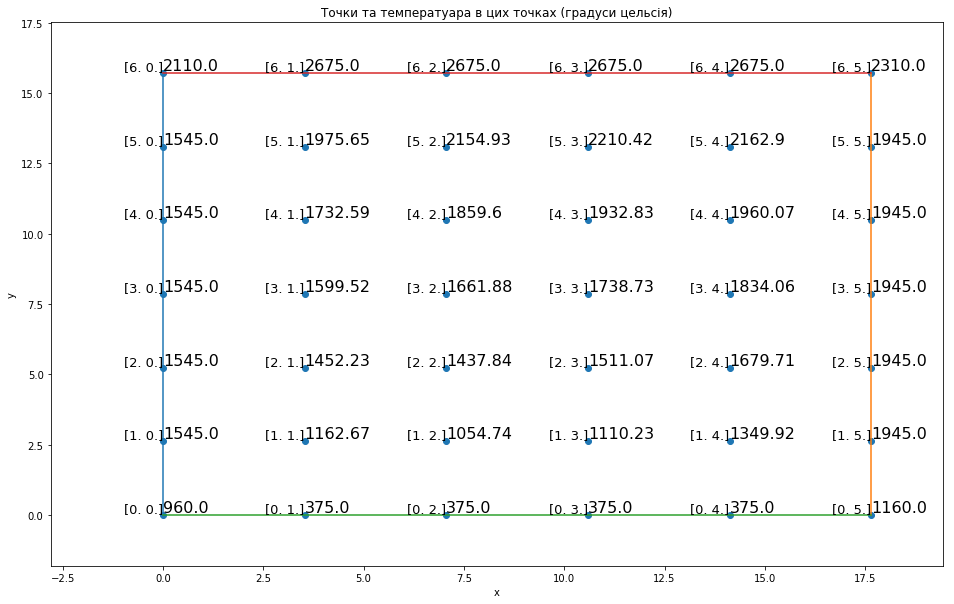

In [140]:
plt.figure(figsize=(16, 10))
plt.subplot(111, facecolor='w')
alignment1 = {'horizontalalignment': 'left', 'verticalalignment': 'bottom'}
for k in range(len(P_all)):
    plt.text(P_all_t[1,k], P_all_t[0,k], P_all[k], **alignment, size = 13)
    plt.text(P_all_t[1,k], P_all_t[0,k], an[k], **alignment1, size = 16)

plt.scatter(P_all_t[1], P_all_t[0])

Y = np.linspace(0, h*(c_x+1))
X = np.linspace(0, l*(c_y+1))
plt.plot([0]*len(Y), X)
plt.plot([h*(c_x+1)]*len(Y), X)
plt.plot(Y, [0]*len(X))
plt.plot(Y, [l*(c_y+1)]*len(X))
plt.title("Точки та температуара в цих точках (градуси цельсія)")
plt.xlabel('x')
plt.ylabel('y')

plt.axis([-2.8, h*c_x+h+1.8, -1.8, l*c_y+l+1.8])
plt.show()

In [141]:
((1535+1054.74)*beta+(375+1452.23)*alfa)/gama

-1159.4471697205217

In [142]:
P_all0 = list()
P_all1 = list()
answer = []
print()
for i in range(len(an)):
    if P_all_t[1, i] <= 0.01 or P_all_t[0, i] <= 0.01 or P_all_t[1, i] >= h*(c_x+1)-0.01 or P_all_t[0, i] >= l*(c_y+1)-0.01:
        pass
    elif i == 27 or i == 13 or i == 14 or i == 8 or i == 15:
        pass
    else:
        P_all0.append(P_all_t[1, i])
        P_all1.append(P_all_t[0, i])
        answer.append(an[i])
# print(len(P_all0), P_all0)
# print(len(P_all1), P_all1)
# print(len(answer), answer)

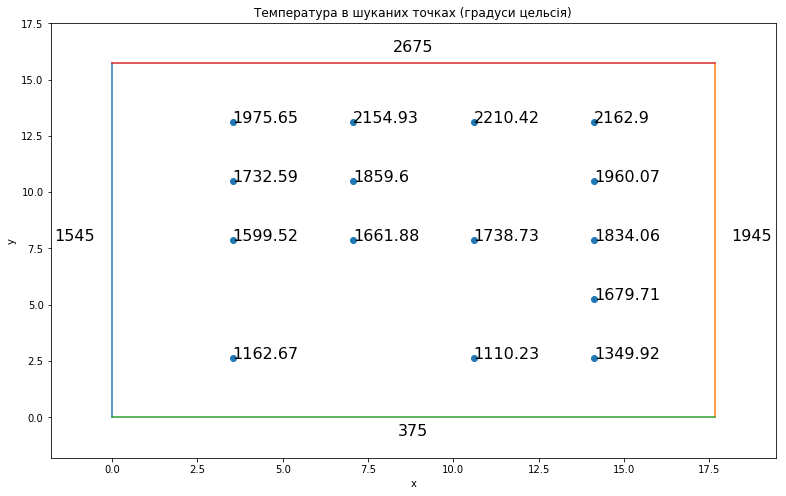

In [143]:
plt.figure(figsize=(13, 8))
plt.subplot(111, facecolor='w')
alignment = {'horizontalalignment': 'right', 'verticalalignment': 'baseline'}
alignment1 = {'horizontalalignment': 'left', 'verticalalignment': 'baseline'}
for k in range(len(answer)):
    plt.text(P_all0[k], P_all1[k], answer[k], **alignment1, size = 16)

plt.scatter(P_all0, P_all1)
plt.text(-0.5, l*(c_y+1)/2, t_left, size = 16, rotation=0, horizontalalignment='right')
plt.text(h*(c_x+1)+0.5, l*(c_y+1)/2, t_right, size = 16, rotation=0, horizontalalignment='left')
plt.text(h*(c_x+1)*0.5, -0.8, t_down, size = 16, rotation=0, horizontalalignment='center')
plt.text(h*(c_x+1)*0.5, l*(c_y+1)+0.5, t_up, size = 16, rotation=0, horizontalalignment='center')
Y = np.linspace(0, h*(c_x+1))
X = np.linspace(0, l*(c_y+1))
plt.plot([0]*len(Y), X)
plt.plot([h*(c_x+1)]*len(Y), X)
plt.plot(Y, [0]*len(X))
plt.plot(Y, [l*(c_y+1)]*len(X))
plt.title("Температура в шуканих точках (градуси цельсія)")
plt.xlabel('x')
plt.ylabel('y')

plt.axis([-1.8, h*c_x+h+1.8, -1.8, l*c_y+l+1.8])
plt.show()